<a href="https://colab.research.google.com/github/KK-Niraj/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking Analysis**
## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Introduction**

In [1]:
# Import pandas package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the csv file
file_path = '/content/drive/MyDrive/EDA Capstone Projects/Python/'
df = pd.read_csv(file_path + 'Hotel Bookings.csv')

In [ ]:
# Checking total rows and columns in data
print(df.shape)

(119390, 32)


In [ ]:
# Checking first 15 rows in data
df.head(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [ ]:
# Checking last 15 rows in data
df.tail(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119375,City Hotel,0,200,2017,August,35,30,1,4,2,...,No Deposit,16.0,NaN,0,Transient,85.50,0,1,Check-Out,2017-09-04
119376,City Hotel,0,165,2017,August,35,29,1,5,3,...,No Deposit,9.0,NaN,0,Transient,209.25,0,3,Check-Out,2017-09-04
119377,City Hotel,0,185,2017,August,35,30,1,4,2,...,No Deposit,9.0,NaN,0,Transient,99.00,0,1,Check-Out,2017-09-04
119378,City Hotel,0,247,2017,August,35,31,1,3,2,...,No Deposit,42.0,NaN,0,Transient,86.85,0,0,Check-Out,2017-09-04
119379,City Hotel,0,109,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,155.00,0,1,Check-Out,2017-09-04
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06


# **Dataset**

In [ ]:
# Checking basic information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Exploring descriptive statistical parameter
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Data Cleaning**

In [ ]:
# Checking the total number of null values in every columns
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Replace the null values of “children” column by 0.
df['children'] = df.fillna(0,inplace = True)

In [ ]:
# Replace the null values in the “agent” column by mean of that column.
df['agent'] = df.fillna(df['agent'].mean(), inplace = True)

# Arriving Year, Leadtime and Cancellations

Text(0, 0.5, 'Lead Time')

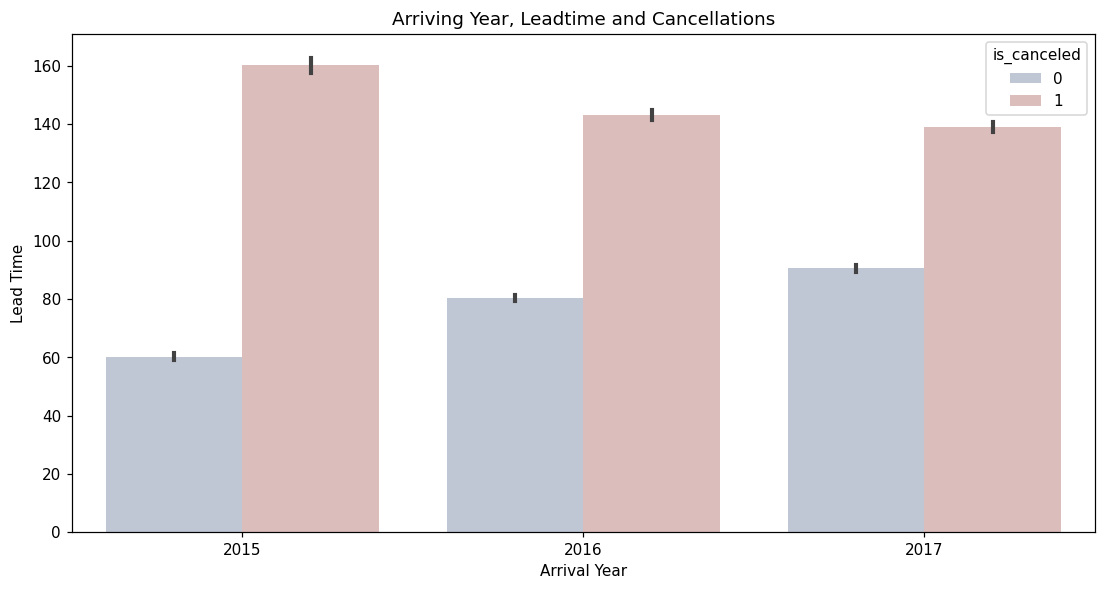

In [13]:
plt.figure(figsize = (12,6), dpi=110)
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', data=df, palette='vlag')
plt.title('Arriving Year, Leadtime and Cancellations')
plt.xlabel('Arrival Year')
plt.ylabel('Lead Time')

# Which month is the most occupied with Bookings at Hotel

Text(0, 0.5, 'Count')

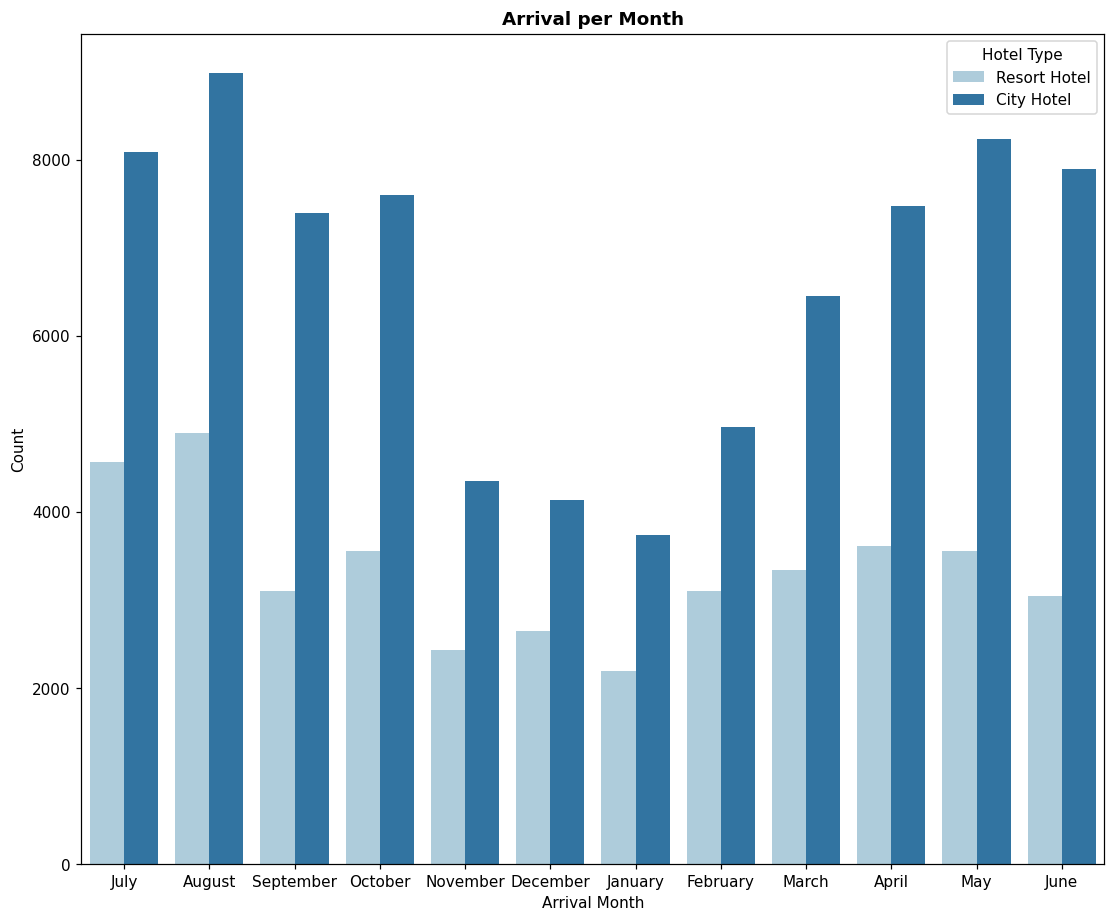

In [ ]:
plt.figure(figsize = (12,10), dpi=110)
sns.countplot(x = 'arrival_date_month', data = df, hue ='hotel',  palette='Paired')
plt.title('Arrival per Month', weight='bold')
plt.legend(title='Hotel Type')
plt.xlabel('Arrival Month')
plt.ylabel('Count')

# Customer Type

In [7]:
df['customer_type'].value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

Text(0, 0.5, 'Customer Count')

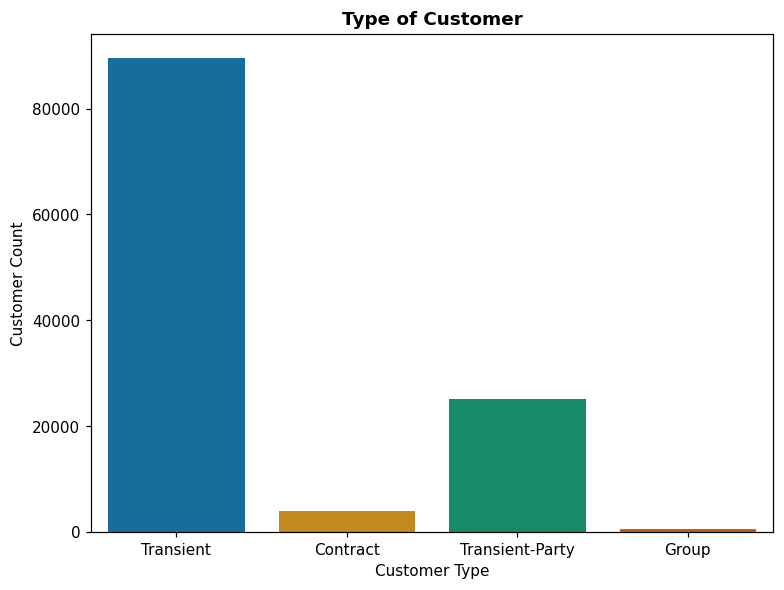

In [11]:
plt.figure(figsize = (8,6), dpi=110)
sns.countplot(x = 'customer_type', data = df, palette='colorblind')
plt.title('Type of Customer', weight='bold')
plt.xlabel('Customer Type')
plt.ylabel('Customer Count')

# Top 10 Countries of Origin

In [4]:
df['country'].value_counts(normalize=True)

PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
         ...   
DJI    0.000008
BWA    0.000008
HND    0.000008
VGB    0.000008
NAM    0.000008
Name: country, Length: 177, dtype: float64

Text(0, 0.5, 'Reservation Count')

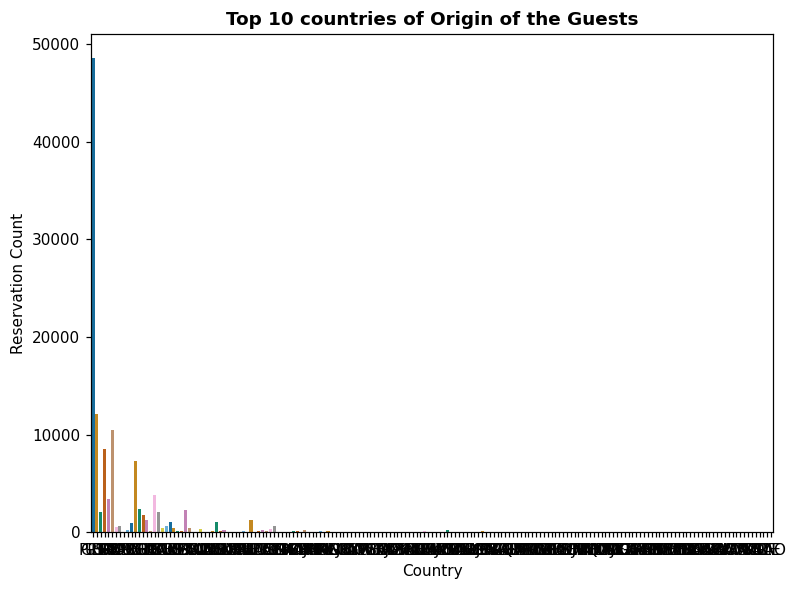

In [5]:
plt.figure(figsize = (8,6), dpi=110)
sns.countplot(x = 'country', data = df, palette='colorblind')
plt.title('Top 10 countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')

# Market Segment Types

In [8]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

Text(0, 0.5, 'Count')

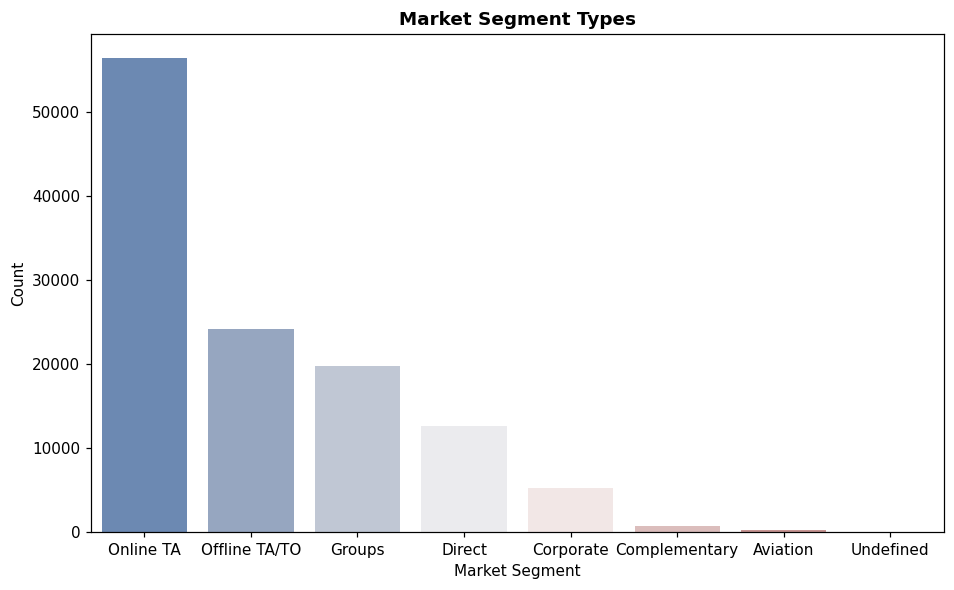

In [9]:
plt.figure(figsize = (10,6), dpi=110)
sns.barplot(x = df['market_segment'].value_counts().index,y = df['market_segment'].value_counts().values, palette='vlag')
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

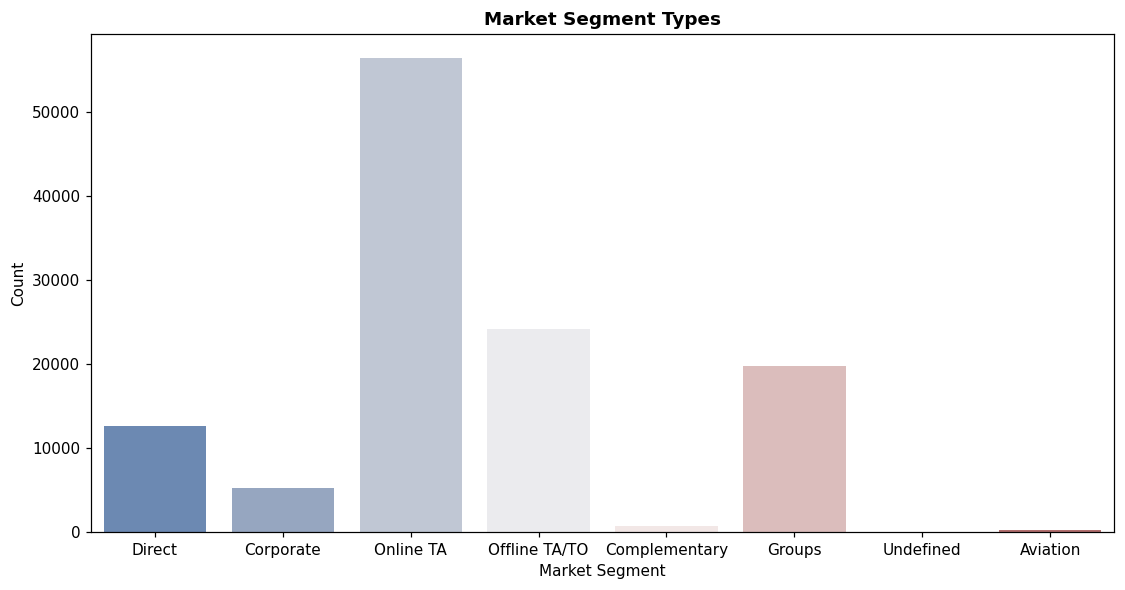

In [10]:
plt.figure(figsize = (12,6), dpi=110)
sns.countplot(x = 'market_segment',data = df, palette='vlag')
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Count')

# Feature Selection and Feature Engineering

In [ ]:
df_subset = df.copy()

In [ ]:
df_subset =df_subset.drop(df_subset[(df_subset.adults+df_subset.babies+df_subset.children)==0].index)

In [ ]:
df_subset['Room'] = 0

In [ ]:
df_subset.loc[df_subset['reserved_room_type'] == df_subset['assigned_room_type'],'Room'] = 1

In [ ]:
df_subset['net_cancelled'] = 0

In [ ]:
df_subset.loc[df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'],'net_cancelled'] = 1

In [ ]:
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled'],axis=1)

In [ ]:
df_subset = df_subset.drop(['reservation_status'],axis=1)

In [ ]:
# df_subset = df_subset.drop(['children'],axis=1) # Check this part

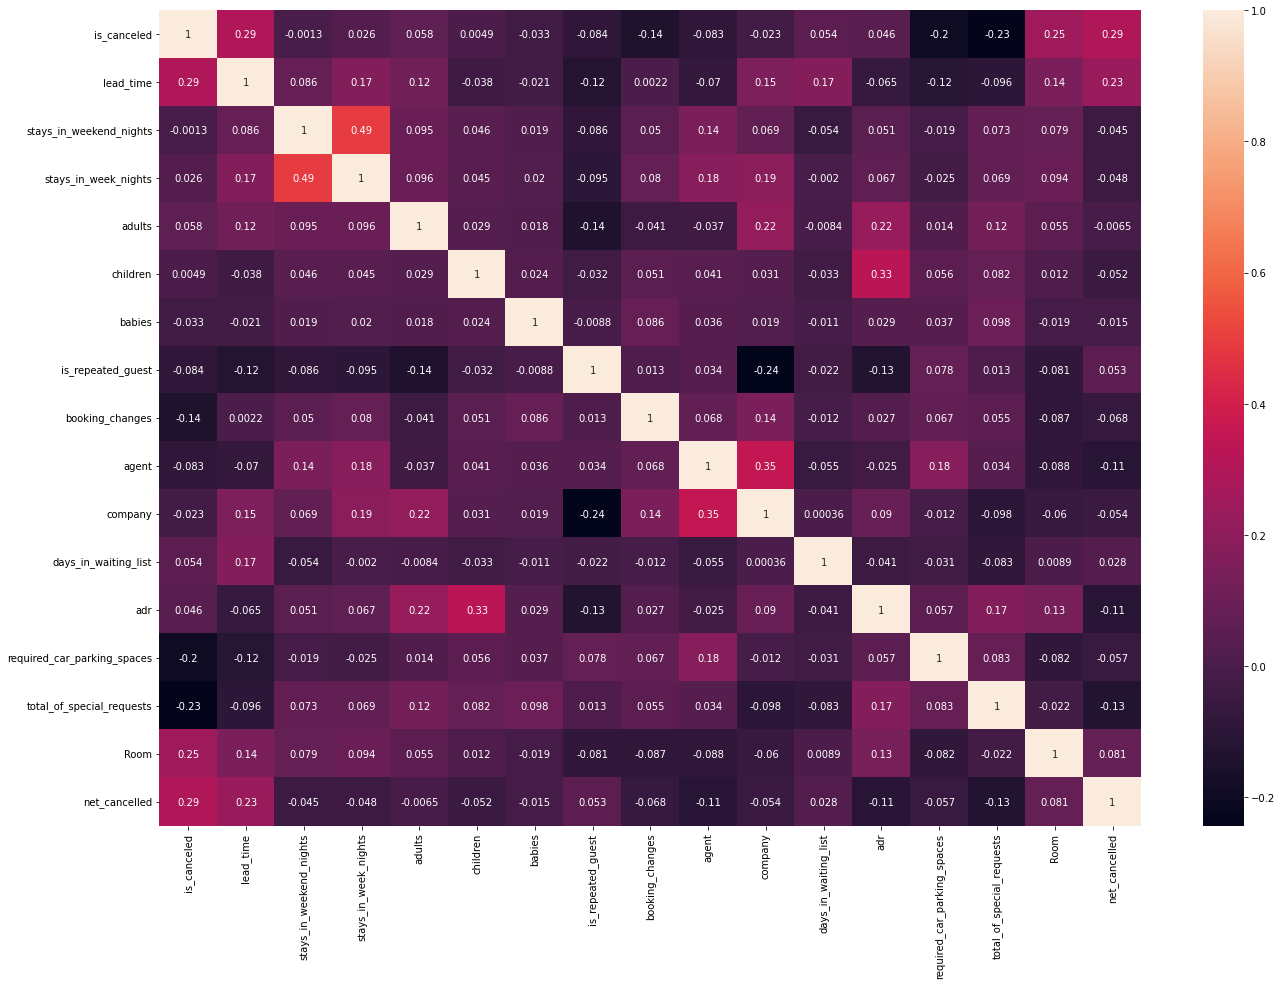

In [ ]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(),annot=True,ax=ax)

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df[['reserved_room_type','assigned_room_type','booking_changes']]

,reserved_room_type,assigned_room_type,booking_changes
0,C,C,3
1,C,C,4
2,A,C,0
3,A,A,0
4,A,A,0
...,...,...,...
119385,A,A,0
119386,E,E,0
119387,D,D,0
119388,A,A,0


In [ ]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)